In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [15]:
# Load the Excel data into a Pandas DataFrame
car_data = pd.read_csv('CarPrice_Assignment[1].csv')

In [16]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
# Data Preprocessing
# Convert categorical variables to numerical using one-hot encoding
# car_data = pd.get_dummies(car_data, columns=['CarName', 'fueltype'], drop_first=True)

In [31]:
# Select the features (independent variables) and target variable (dependent variable)
X = car_data[['horsepower', 'highwaympg']]
y = car_data['price']

In [32]:
pd.DataFrame(X)

,horsepower,highwaympg
0,111,27
1,111,27
2,154,26
3,102,30
4,115,22
...,...,...
200,114,28
201,160,25
202,134,23
203,106,27


In [33]:
pd.DataFrame(y)

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Create a linear regression model
model = LinearRegression()

In [37]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'Root Mean Squared Error: {rmse}')
# print(f'Mean Absolute Error: {mae}')
# print(f'R-squared (R2) Score: {r2}')

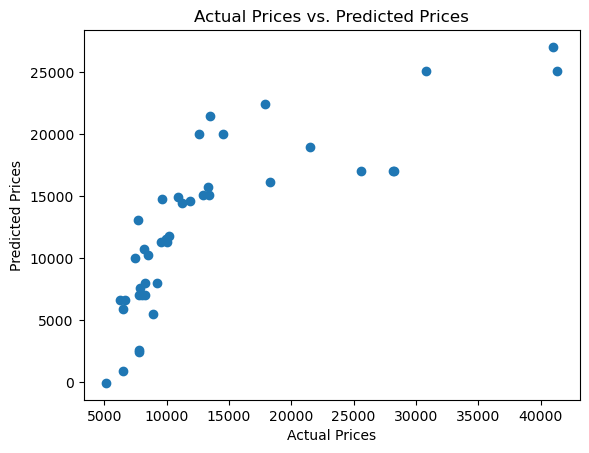

In [39]:
# Visualize the predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [40]:
# Now, you can use the trained model to predict car prices for new data
new_data = pd.DataFrame({
    'horsepower': [200],
    'highwaympg': [25]
})

# Feature scaling for new data
new_data_scaled = scaler.transform(new_data)

predicted_price = model.predict(new_data_scaled)
print(f'Predicted Price for New Data: {predicted_price[0]}')

Predicted Price for New Data: 26423.617727730994
